In [2]:
import kagglehub
import os
import pandas as pd

# Previous Dataset
Dataset User Purchase Behavior Analysis Dataset

In [3]:
path_purchase = kagglehub.dataset_download("refiaozturk/online-shopping-dataset")
dataset_purchase = pd.read_csv(path_purchase+"/dataset.csv")



100%|██████████| 177k/177k [00:00<00:00, 8.75MB/s]

Extracting files...


In [ ]:
# Show the first few rows of the dataframe
print(dataset_purchase.head())
print("Shape: ", dataset_purchase.shape)

   User ID   Age  Gender    Country  Purchase Amount Purchase Date  \
0        1  56.0  Female        USA           331.79    2021-11-21   
1        2  69.0    Male  Australia           335.72    2022-03-05   
2        3  46.0     NaN    Germany           493.18           NaN   
3        4  32.0    Male    Germany            80.97    2023-06-08   
4        5  60.0  Female         UK            21.75           NaN   

  Product Category  
0           Sports  
1   Home & Kitchen  
2            Books  
3           Sports  
4           Beauty  
Shape:  (15000, 7)


In [4]:
continuous_features = dataset_purchase.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = dataset_purchase.select_dtypes(include=['object', 'category']).columns.tolist()

print("Continuous Features:", continuous_features)

print("\nCategorical Features:", categorical_features)

Continuous Features: ['User ID', 'Age', 'Purchase Amount']

Categorical Features: ['Gender', 'Country', 'Purchase Date', 'Product Category']


Missing values

In [ ]:
# Check for NaN values in dataset_purchase
nan_counts = dataset_purchase.isnull().sum()

# Print features with and without NaN values
print("Features with NaN values:")
print(nan_counts[nan_counts > 0])

print("\nFeatures without NaN values:")
print(nan_counts[nan_counts == 0].index.tolist())

# Check rows with and without NaN values
print("\nRows with NaN values:", dataset_purchase.isnull().any(axis=1).sum())
print("Rows without NaN values:", dataset_purchase.notnull().all(axis=1).sum())


Features with NaN values:
Age                 1232
Gender               620
Country              970
Product Category     751
dtype: int64

Features without NaN values:
['User ID', 'Purchase Amount']

Rows with NaN values: 3191
Rows without NaN values: 9076


Dataset muito equilibrado

In [5]:
dataset_purchase_no_nuns = dataset_purchase.dropna()
dataset_purchase_no_nuns.shape

(9076, 7)

## Visualizations

<ipython-input-33-b4e8f1e0a5d3>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_category_sums = dataset_purchase.groupby([pd.Grouper(freq='Y'), 'Product Category'])['Purchase Amount'].sum().unstack(fill_value=0)


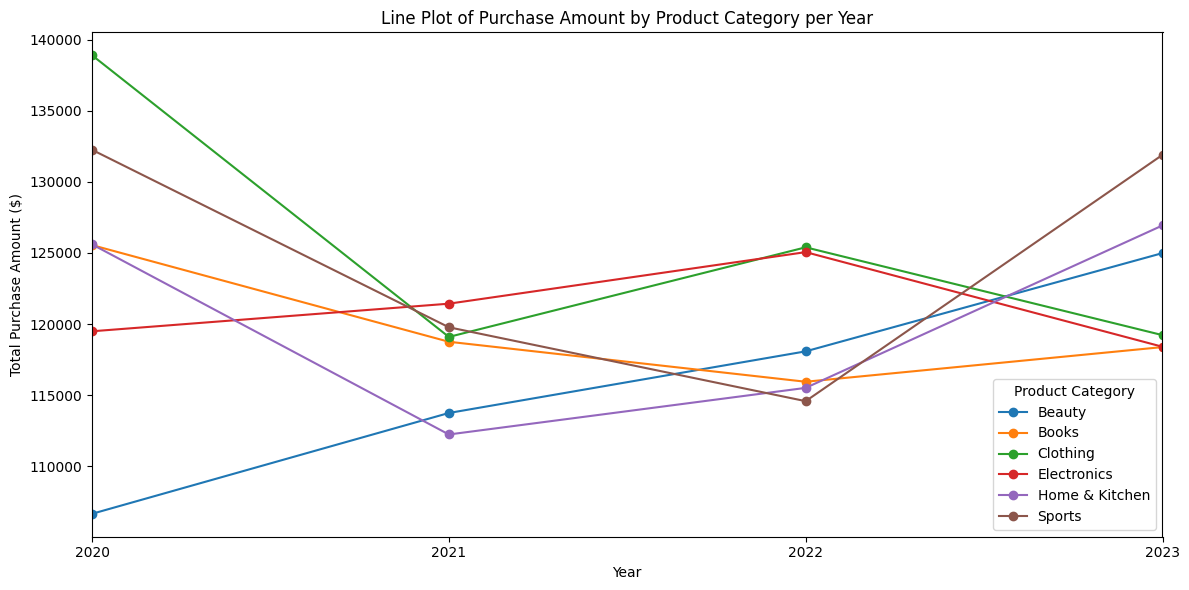

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset_purchase is the DataFrame containing the dataset
# Step 1: Convert 'Purchase Date' to datetime format
dataset_purchase['Purchase Date'] = pd.to_datetime(dataset_purchase['Purchase Date'], errors='coerce')

# Step 2: Remove rows with missing 'Purchase Date' or 'Purchase Amount'
dataset_purchase = dataset_purchase.dropna(subset=['Purchase Date', 'Purchase Amount'])

# Step 3: Set 'Purchase Date' as the index for resampling
dataset_purchase.set_index('Purchase Date', inplace=True)

# Step 4: Group by year and product category, and sum the 'Purchase Amount'
yearly_category_sums = dataset_purchase.groupby([pd.Grouper(freq='Y'), 'Product Category'])['Purchase Amount'].sum().unstack(fill_value=0)

# Step 5: Plot a line plot for each product category
yearly_category_sums.plot(kind='line', figsize=(12, 6), marker='o')

# Step 6: Customize the plot
plt.title('Line Plot of Purchase Amount by Product Category per Year')
plt.xlabel('Year')
plt.ylabel('Total Purchase Amount ($)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Product Category')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

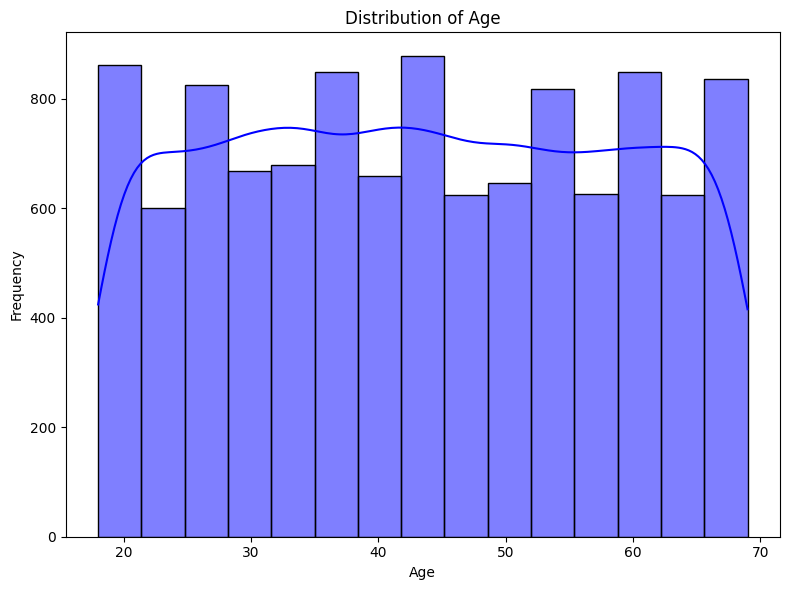

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for Age and Purchase Amount
plt.figure(figsize=(12, 6))

# Age Histogram
plt.figure(figsize=(8, 6))
sns.histplot(dataset_purchase['Age'], bins=15, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Ensure dates are properly parsed
#dataset_purchase_no_nuns['Purchase Date'] = pd.to_datetime(dataset_purchase_no_nuns['Purchase Date'], errors='coerce') #
#dataset_purchase_no_nuns['Date'] = dataset_purchase_no_nuns['Purchase Date'].dt.strftime('%Y-%m')  # Year-Month format
dataset_purchase_no_nuns = dataset_purchase.reset_index()  # Reset index to bring back 'Purchase Date' as a column if you need it in the plot
dataset_purchase_no_nuns['Year'] = dataset_purchase_no_nuns['Purchase Date'].dt.year  # Extract Year

# Create subplot figure (vertically stacked)
fig = make_subplots(rows=3, cols=1,
                    subplot_titles=('Total Purchase by Country',
                                    'Total Purchase by Product Category',
                                    'Total Purchase by Year'),
                    vertical_spacing=0.1)

# 1. Total Purchase by Country
country_data = dataset_purchase.groupby('Country')['Purchase Amount'].sum().sort_values(ascending=True)
fig.add_trace(go.Bar(y=country_data.index,
                     x=country_data.values,
                     orientation='h',
                     name='Country',
                     marker_color='orange'),
              row=1, col=1)

# 2. Total Purchase by Product Category
category_data = dataset_purchase.groupby('Product Category')['Purchase Amount'].sum().sort_values(ascending=True)
fig.add_trace(go.Bar(y=category_data.index,
                     x=category_data.values,
                     orientation='h',
                     name='Category',
                     marker_color='blue'),
              row=2, col=1)

# 3. Total Purchase by Year
year_data = dataset_purchase_no_nuns.groupby('Year')['Purchase Amount'].sum().sort_values(ascending=True)
fig.add_trace(go.Bar(y=year_data.index.astype(str),
                     x=year_data.values,
                     orientation='h',
                     name='Year',
                     marker_color='green'),
              row=3, col=1)

# Update layout
fig.update_layout(height=800,
                  width=800,
                  title_text='Purchase Amount Distributions',
                  showlegend=False)

# Update axes
fig.update_xaxes(title_text='Total Purchase Amount ($)')

fig.show()

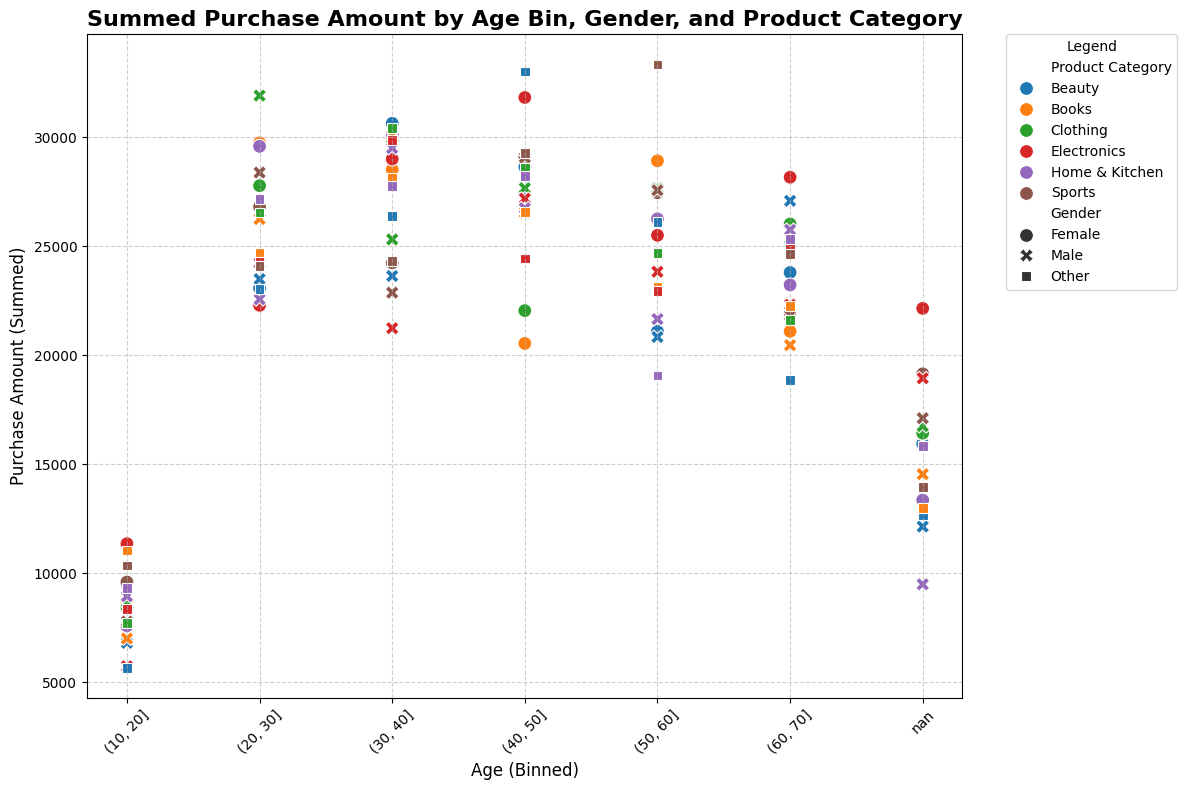

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create age bins (e.g., 0-5, 5-10, ..., 95-100)
#age_bins = pd.interval_range(start=0, end=100, freq=5)
age_bins = pd.interval_range(start=0, end=100, freq=10)
dataset_purchase_no_nuns['Age Bin'] = pd.cut(dataset_purchase_no_nuns['Age'], bins=age_bins, right=False)

# Remove rows where Age Bin is NaN #dataset = dataset_purchase_no_nuns.dropna(subset=['Age Bin'])

# Convert Age Bin to a string representation for plotting
dataset_purchase_no_nuns['Age Bin'] = dataset_purchase_no_nuns['Age Bin'].astype(str)

# Group by Age Bin, Gender, and Product Category, then sum Purchase Amount
aggregated_data = (
    dataset_purchase_no_nuns.groupby(['Age Bin', 'Gender', 'Product Category'], observed=True)
    .agg({'Purchase Amount': 'sum'})
    .reset_index()
)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=aggregated_data,
    x='Age Bin',
    y='Purchase Amount',
    hue='Product Category',  # Color for Product Category
    style='Gender',          # Marker shape for Gender
    palette='tab10',         # Adjust color palette
    s=100                    # Marker size
)

# Customize the x-axis for age bins
scatter.set_xticks(range(len(aggregated_data['Age Bin'].unique())))
scatter.set_xticklabels(sorted(aggregated_data['Age Bin'].unique()), rotation=45)

# Set plot title and labels
scatter.set_title('Summed Purchase Amount by Age Bin, Gender, and Product Category', fontsize=16, weight='bold')
scatter.set_xlabel('Age (Binned)', fontsize=12)
scatter.set_ylabel('Purchase Amount (Summed)', fontsize=12)

# Enhance legend
plt.legend(
    title='Legend',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10
)


# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)
# Adjust layout for clarity
plt.tight_layout()
plt.show()


# Gym

https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [7]:
import plotly.express as px


In [8]:
import kagglehub
import os
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")
# List the files in the downloaded path #files = os.listdir(path) #print(files)

100%|██████████| 21.6k/21.6k [00:00<00:00, 15.8MB/s]

Extracting files...


In [9]:
dataset = pd.read_csv(r"/root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1/gym_members_exercise_tracking.csv")#/User Listening History.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
import pandas as pd
for column in dataset.columns:
    if pd.api.types.is_numeric_dtype(dataset[column]):
        max_value = dataset[column].max()
        min_value = dataset[column].min()
        print(f"{column}" ,f"Max: {max_value},", f" Min: {min_value}")
    elif pd.api.types.is_object_dtype(dataset[column]) or pd.api.types.is_categorical_dtype(dataset[column]):
        categories = dataset[column].unique()
        print(f"{column}" , f"- Categories: {categories}")
    print("- " *40)  # Separator between features


Age Max: 59,  Min: 18
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Gender - Categories: ['Male' 'Female']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Weight (kg) Max: 129.9,  Min: 40.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Height (m) Max: 2.0,  Min: 1.5
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Max_BPM Max: 199,  Min: 160
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Avg_BPM Max: 169,  Min: 120
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resting_BPM Max: 74,  Min: 50
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Session_Duration (hours) Max: 2.0,  Min: 0.5
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Calories_Burned Max: 1783.0,  Min: 303.0
- - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# Check if there are any NaN values in the dataset
if dataset.isnull().sum().sum() == 0:
    print("No NaN values in the dataset.")
else:
    print("There are missing values in the dataset.")


No NaN values in the dataset.


## Explore Dataset

Lets first explore if the data has very specific overall patterns by applying a PCA.

In [40]:
import plotly.graph_objs as go
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = dataset

# Separate categorical and numerical columns
categorical_cols = ['Gender', 'Workout_Type']
numerical_cols = [col for col in df.columns if col not in categorical_cols and col != 'Experience_Level']

# Step 1: One-Hot Encode categorical variables and Standardize numerical variables
preprocessor = ColumnTransformer(
   transformers=[
       ('num', StandardScaler(), numerical_cols),
       ('cat', OneHotEncoder(drop='first'), categorical_cols)
   ])

# Step 2: Apply PCA for dimensionality reduction
pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('pca', PCA(n_components=2))
])

# Step 3: Fit the pipeline and transform the data
df_reduced_pca = pipeline.fit_transform(df)

# Step 4: Convert reduced dimensions to a DataFrame for visualization
df_reduced = pd.DataFrame(df_reduced_pca, columns=['PCA1', 'PCA2'])
df_reduced['Experience_Level'] = df['Experience_Level']
df_reduced['Gender'] = df['Gender']

# Define marker shapes and colors
shape_map = {'Male': 'circle', 'Female': 'square'}
color_map = {1: 'blue', 2: 'green', 3: 'red'}

# Create traces for each experience level and gender
traces = []
for level in df_reduced['Experience_Level'].unique():
   for gender in df_reduced['Gender'].unique():
       subset = df_reduced[(df_reduced['Experience_Level'] == level) & (df_reduced['Gender'] == gender)]

       traces.append(go.Scatter(
           x=subset['PCA1'],
           y=subset['PCA2'],
           mode='markers',
           name=f'Level {level} - {gender}',
           marker=dict(
               size=12,  # Bigger circles
               color=color_map[level],
               symbol=shape_map[gender],
               opacity=0.7
           )
       ))

# Create the layout
layout = go.Layout(
   title='Hybrid PCA Scatter Plot by Experience Level and Gender',
   xaxis=dict(title='PCA Component 1'),
   yaxis=dict(title='PCA Component 2'),
   hovermode='closest'
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show the Plotly scatter plot
fig.show()

1) We can see  that there's quite a bit of difference between the genders. Gender differences is going to be a big deal.

2) We can also see that the experience level 3 is drastically different from the other levels.

### Gender differences

We can visualize a significant difference between men and women.

To avoid creating unrealistic and unnecessary expectations, visualizations should be gender-specific. Specially when comparing metrics like body fat percentage or BMI.  



In [75]:
import plotly.graph_objects as go

color_palette = {"Male": "blue", "Female": "red"}

fig = go.Figure()
# plot
fig.add_trace(go.Scatter(
   x=dataset["Water_Intake (liters)"],
   y=dataset["Fat_Percentage"],
   mode="markers",
   marker=dict(
       size=14,
       color=[color_palette[gender] for gender in dataset["Gender"]],
       line=dict(width=1, color='white'),
       opacity=0.5
   ),
   text=dataset["Gender"],
   showlegend=False
))
# Layout
fig.update_layout(
   title={
       'text': "Water Intake vs. Fat Percentage by Gender",
       'y':0.9,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top',
       'font': dict(size=16)
   },
   xaxis_title="Water Intake (Liters)",
   yaxis_title="Fat Percentage (%)",
   height=500,
   width=700,
   template="plotly_white",
   legend_title_text='Gender',
   hoverlabel=dict(
       bgcolor="white",
       font_size=12,
       font_family="Arial"
   )
)

# Legend Entries
fig.add_trace(go.Scatter(
   x=[None], y=[None], mode='markers',
   marker=dict(size=10, color=color_palette["Male"]),
   name='Male'
))

fig.add_trace(go.Scatter(
   x=[None], y=[None], mode='markers',
   marker=dict(size=10, color=color_palette["Female"]),
   name='Female'
))
fig.show()


### Experience Level Differences

In [73]:
import plotly.express as px

# Create datasets by gender
dataset_male = dataset[dataset['Gender'] == 'Male']
dataset_female = dataset[dataset['Gender'] == 'Female']

# Verify the creation of datasets
print(f"Male dataset shape: {dataset_male.shape}")
print(f"Female dataset shape: {dataset_female.shape}")


# Scatter plot: BMI vs Fat Percentage
fig = px.scatter(
    dataset_male,
    x="BMI",
    y="Fat_Percentage",
    color="Experience_Level",  # Optional: Color by Experience Level
    title="Body Composition - BMI vs Fat Percentage (Males Only)",
    labels={
        "BMI": "Body Mass Index (BMI)",
        "Fat_Percentage": "Fat Percentage",
        "Experience_Level": "Experience Level"
    },
    hover_data=["Resting_BPM", "Workout_Frequency (days/week)"]  # Additional information
)

# Update layout for aesthetics
fig.update_layout(
    height=500,
    width=800,
    plot_bgcolor="rgba(240,240,240,0.5)"
)

# Show the plot
fig.show()


Male dataset shape: (511, 15)
Female dataset shape: (462, 15)


### Other analyses

In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

#numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
violin_numerical_columns = [ 'Weight (kg)', 'Height (m)', 'Calories_Burned', 'Fat_Percentage','Water_Intake (liters)',  'BMI']
#other = ['Age','Session_Duration (hours)',  'Workout_Frequency (days/week)', 'Experience_Level' ]
#bpm = ['Max_BPM', 'Avg_BPM', 'Resting_BPM'] #

categorical_column = 'Gender'

num_columns = len(violin_numerical_columns)
num_rows = 2
num_cols = (num_columns + num_rows - 1) // num_rows

# Create subplot layout
fig = make_subplots(rows=num_rows, cols=num_cols,
                    subplot_titles=[f'{feature}' for feature in violin_numerical_columns],
                    shared_yaxes=True, vertical_spacing=0.1)

# Add violin plots for each numerical feature against 'Gender'
for i, feature in enumerate(violin_numerical_columns):
    row = i // num_cols + 1  # Determine row index
    col = i % num_cols + 1   # Determine column index

    trace = go.Violin(y=dataset[categorical_column], x=dataset[feature],
                      box_visible=True, line_color='black',
                      marker=dict(color='rgba(100,100,100,0.6)'),
                      name=feature, orientation='h')

    fig.add_trace(trace, row=row, col=col)

# Update layout for better fitting
fig.update_layout(
    height=600,  # Adjust height to fit three rows
    width=1400,   # Adjust width to fit the plots comfortably
    title_text='Violin Plots of Numerical Features by Gender',
    showlegend=False
)

# Show the plot
fig.show()


In [74]:
import plotly.graph_objs as go
import plotly.express as px

# Prepare data
experience_levels = sorted(dataset['Experience_Level'].unique())
boxplot_data = [
    dataset[dataset['Experience_Level'] == level]['Workout_Frequency (days/week)']
    for level in experience_levels
]

# Color palette
colors = px.colors.qualitative.Plotly[:len(experience_levels)]

# Plot
fig = go.Figure(data=[
    go.Box(
        y=data,
        name=f'Level {level}',
        marker_color=color
    )
    for level, data, color in zip(experience_levels, boxplot_data, colors)
])
# Layout
fig.update_layout(
    title='Workout Frequency by Experience Level',
    yaxis_title='Workout Frequency (days/week)',
    height=400,
    width=600,
    plot_bgcolor='rgba(240,240,240,0.5)',
    paper_bgcolor='white'
)

fig.update_traces(
    boxpoints='outliers',
    line_width=1.5,
    opacity=0.7
)

fig.show()


# User Visualizations

Organization:
- After Sign up: Place basic personal data (age, height, weight, Resting BPM)
- Show where you are in the overall population filtered for their age and gender with (avgBPM, Fat Percentage, Weight)


- Then we go into recommnendation territory:
- How many liters of water to drink,
- nr of workouts per week


Separated into categories:
Point of reference visualizatoins: Where you lie in the population (include where they could go in 6 months with proper training - check healthy weight/fat % change, )
Recommendation Visualizations: What we would recommend the person to do based on data.

Very interesting would be to visualize exercise progression. But this data is not on our dataset so we'll refrain from dwelving into it.





